In [16]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [24]:
data_path = '/content/drive/MyDrive/flower_dataset/flowers'

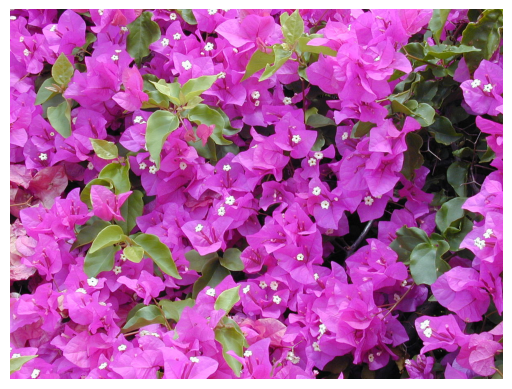

In [27]:
import os
from PIL import Image
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/flower_dataset/flowers/bougainvillea_00003.jpg'
img = Image.open(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()


In [28]:
import os
import numpy as np
from tensorflow import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

In [51]:
import os
import pandas as pd

# Path to your dataset
base_path = '/content/drive/MyDrive/flower_dataset'

# Create a list to hold rows for the CSV
data = []

# Walk through all subdirectories and gather image paths and labels
for label in os.listdir(base_path):
    label_path = os.path.join(base_path, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            if img_file.endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(label_path, img_file)
                data.append({'filepath': img_path, 'label': label})

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_path = '/content/drive/MyDrive/flower_dataset_labels.csv'
df.to_csv(csv_path, index=False)

print(f"✅ CSV created with {len(df)} entries at:\n{csv_path}")
df.head()


✅ CSV created with 733 entries at:
/content/drive/MyDrive/flower_dataset_labels.csv


filepath    label
0  /content/drive/MyDrive/flower_dataset/peonies/...  peonies
1  /content/drive/MyDrive/flower_dataset/peonies/...  peonies
2  /content/drive/MyDrive/flower_dataset/peonies/...  peonies
3  /content/drive/MyDrive/flower_dataset/peonies/...  peonies
4  /content/drive/MyDrive/flower_dataset/peonies/...  peonies

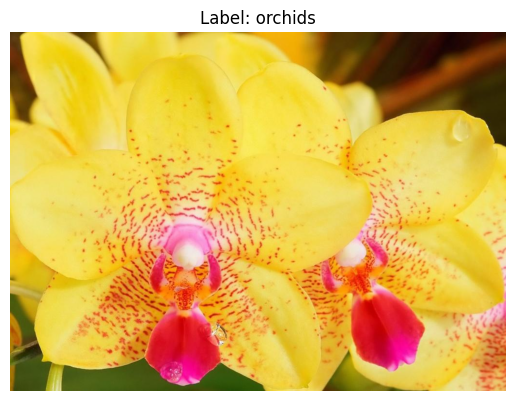

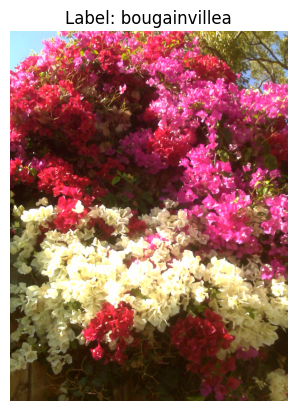

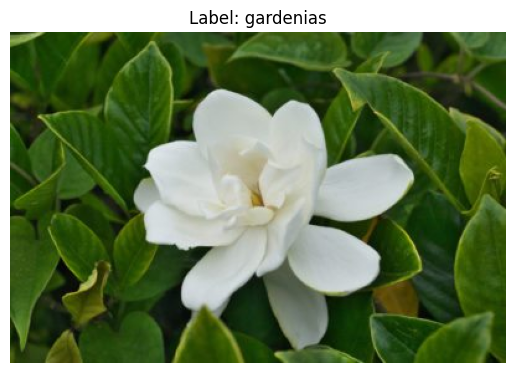

In [50]:
import matplotlib.pyplot as plt
from PIL import Image

# Show 3 random images from the CSV
for i in range(3):
    row = df.sample().iloc[0]
    img = Image.open(row['filepath'])
    plt.imshow(img)
    plt.title(f"Label: {row['label']}")
    plt.axis('off')
    plt.show()


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  733 non-null    object
 1   label     733 non-null    object
dtypes: object(2)
memory usage: 11.6+ KB


In [53]:
df.describe

<bound method NDFrame.describe of                                               filepath       label
0    /content/drive/MyDrive/flower_dataset/peonies/...     peonies
1    /content/drive/MyDrive/flower_dataset/peonies/...     peonies
2    /content/drive/MyDrive/flower_dataset/peonies/...     peonies
3    /content/drive/MyDrive/flower_dataset/peonies/...     peonies
4    /content/drive/MyDrive/flower_dataset/peonies/...     peonies
..                                                 ...         ...
728  /content/drive/MyDrive/flower_dataset/hydrange...  hydrangeas
729  /content/drive/MyDrive/flower_dataset/hydrange...  hydrangeas
730  /content/drive/MyDrive/flower_dataset/hydrange...  hydrangeas
731  /content/drive/MyDrive/flower_dataset/hydrange...  hydrangeas
732  /content/drive/MyDrive/flower_dataset/hydrange...  hydrangeas

[733 rows x 2 columns]>

In [54]:
summary_table = []

for col in df.columns:
    dtype = df[col].dtype

    if dtype == 'object':
        feature_type = 'Categorical'
        unique_vals = df[col].dropna().unique()
        unique_display = ', '.join(map(str, unique_vals[:5]))
        if len(unique_vals) > 5:
            unique_display += ', ...'
    else:
        feature_type = 'Numerical'
        min_val = df[col].min()
        max_val = df[col].max()
        unique_display = f"{min_val} to {max_val}"

    summary_table.append([col, feature_type, unique_display])

feature_summary_df = pd.DataFrame(summary_table, columns=["Feature", "Type", "Values or Range"])
feature_summary_df

Feature         Type                                    Values or Range
0  filepath  Categorical  /content/drive/MyDrive/flower_dataset/peonies/...
1     label  Categorical  peonies, orchids, bougainvillea, daisies, hibi...

In [55]:
import pandas as pd

csv_path = '/content/drive/MyDrive/flower_dataset_labels.csv'  # or your actual path
df = pd.read_csv(csv_path)
df.head()


filepath    label
0  /content/drive/MyDrive/flower_dataset/peonies/...  peonies
1  /content/drive/MyDrive/flower_dataset/peonies/...  peonies
2  /content/drive/MyDrive/flower_dataset/peonies/...  peonies
3  /content/drive/MyDrive/flower_dataset/peonies/...  peonies
4  /content/drive/MyDrive/flower_dataset/peonies/...  peonies

In [58]:
# View the mapping from label_code to label
label_mapping = dict(enumerate(df['label'].cat.categories))
print(label_mapping)


{0: 'bougainvillea', 1: 'daisies', 2: 'garden', 3: 'gardenias', 4: 'hibiscus', 5: 'hydrangeas', 6: 'lilies', 7: 'orchids', 8: 'peonies', 9: 'tulip'}


In [60]:
import os
import shutil

src_folder = '/content/drive/MyDrive/flower_dataset/flowers'
dst_folder = '/content/drive/MyDrive/flower_dataset/'

# Make label folders and move files
for filename in os.listdir(src_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Extract label from filename
        label = filename.split('_')[0].lower()
        label_folder = os.path.join(dst_folder, label)

        # Create folder if it doesn't exist
        os.makedirs(label_folder, exist_ok=True)

        # Move file
        src_path = os.path.join(src_folder, filename)
        dst_path = os.path.join(label_folder, filename)
        shutil.move(src_path, dst_path)

print("Images sorted into labeled subfolders.")


Images sorted into labeled subfolders.


In [49]:
import pandas as pd

base_path = '/content/drive/MyDrive/flower_dataset'
data = []

for label in os.listdir(base_path):
    label_path = os.path.join(base_path, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            if file.endswith(('.jpg', '.jpeg', '.png')):
                data.append({
                    'filepath': os.path.join(label_path, file),
                    'label': label
                })

df = pd.DataFrame(data)
df['label'] = df['label'].astype('category')
df['label_code'] = df['label'].cat.codes

print(df.head())
print(dict(enumerate(df['label'].cat.categories)))


                                            filepath    label  label_code
0  /content/drive/MyDrive/flower_dataset/peonies/...  peonies           8
1  /content/drive/MyDrive/flower_dataset/peonies/...  peonies           8
2  /content/drive/MyDrive/flower_dataset/peonies/...  peonies           8
3  /content/drive/MyDrive/flower_dataset/peonies/...  peonies           8
4  /content/drive/MyDrive/flower_dataset/peonies/...  peonies           8
{0: 'bougainvillea', 1: 'daisies', 2: 'garden', 3: 'gardenias', 4: 'hibiscus', 5: 'hydrangeas', 6: 'lilies', 7: 'orchids', 8: 'peonies', 9: 'tulip'}


In [61]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Optional: total number of missing cells
total_missing = missing_values.sum()
print(f"\nTotal missing values in dataset: {total_missing}")

Missing values per column:
filepath      0
label         0
label_code    0
dtype: int64

Total missing values in dataset: 0


In [75]:
image_size = (180, 180)
image_size = (224, 224)

batch_size = 10

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/flower_dataset",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 734 files belonging to 11 classes.
Using 588 files for training.
Using 146 files for validation.


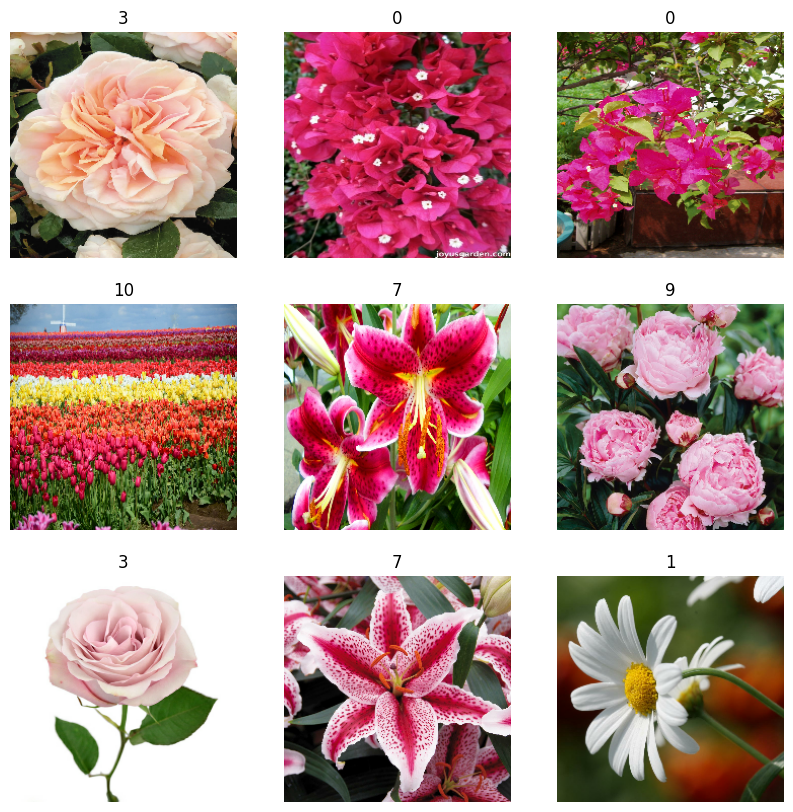

In [76]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [79]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

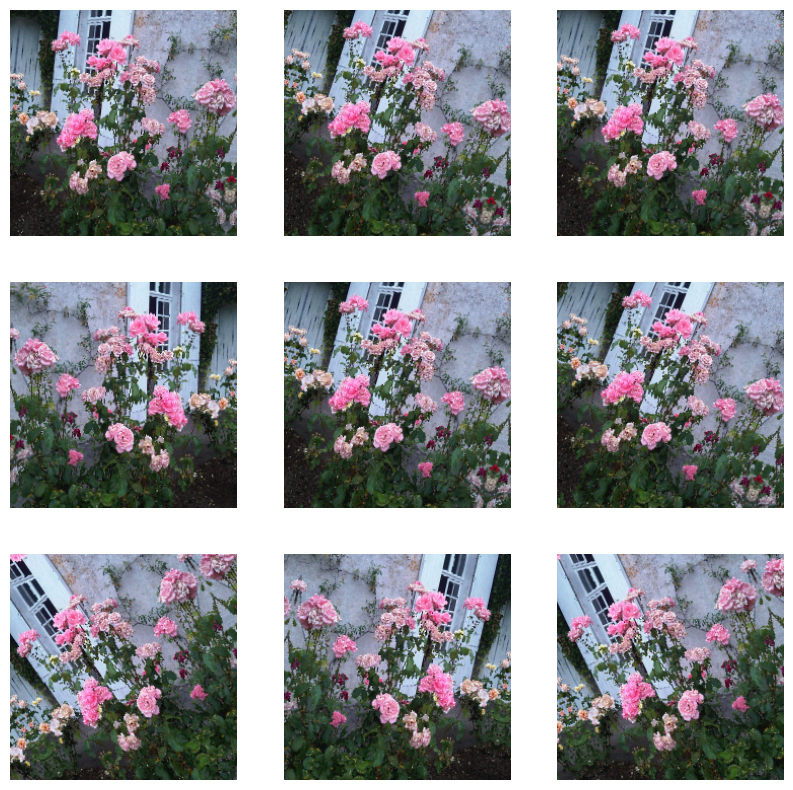

In [80]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [81]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

In [82]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(units, activation=None)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
#keras.utils.plot_model(model, show_shapes=True)

In [84]:

epochs = 8

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]

model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)


Epoch 1/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 619s 10s/step - acc: 0.1611 - loss: -14.1586 - val_acc: 0.0890 - val_loss: -5.7086
Epoch 2/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 601s 10s/step - acc: 0.1379 - loss: -63.5494 - val_acc: 0.0890 - val_loss: -12.9533
Epoch 3/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 603s 10s/step - acc: 0.1224 - loss: -114.9391 - val_acc: 0.0890 - val_loss: -2.4945
Epoch 4/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 604s 10s/step - acc: 0.1540 - loss: -166.9921 - val_acc: 0.0890 - val_loss: -3.1544
Epoch 5/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 616s 10s/step - acc: 0.1320 - loss: -233.6895 - val_acc: 0.0890 - val_loss: -2.2125
Epoch 6/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 603s 10s/step - acc: 0.1626 - loss: -310.1098 - val_acc: 0.0890 - val_loss: -1.9718
Epoch 7/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 604s 10s/step - acc: 0.1244 - loss: -420.2760 - val_acc: 0.0890 - val_loss: -3.2738
Epoch 8/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 596s 10s/step - acc: 0.1081 - loss: -513.9745 - val_acc: 0.0890 - val_loss: -62.3697


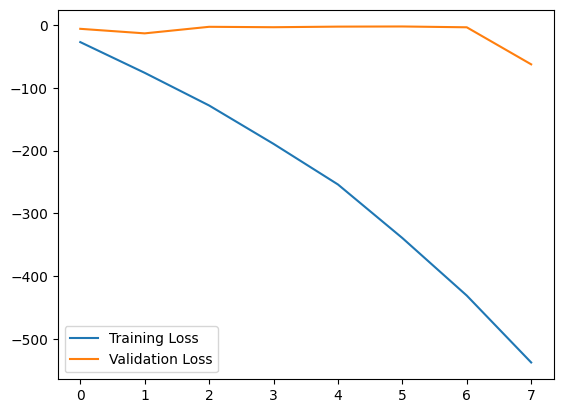

In [85]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

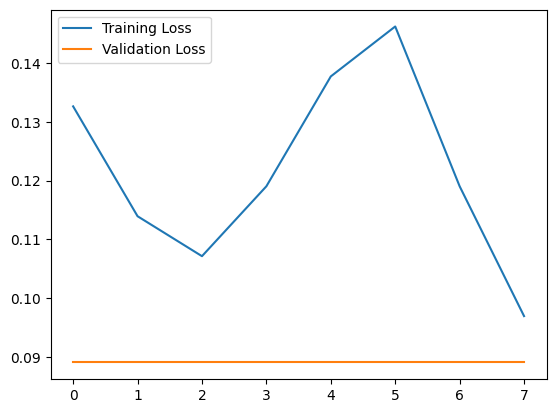

In [86]:
plt.plot(range(len(history.history["acc"])),history.history["acc"],label="Training Loss")
plt.plot(range(len(history.history["val_acc"])),history.history["val_acc"],label="Validation Loss")
plt.legend()

##PROTOTYPE

In [88]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

In [94]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

dataset_path = '/content/drive/MyDrive/flower_dataset'  # must contain subfolders

image_size = (224, 224)
batch_size = 10

train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=1222,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=1222,
    image_size=image_size,
    batch_size=batch_size
)


Found 734 files belonging to 11 classes.
Using 588 files for training.
Found 734 files belonging to 11 classes.
Using 146 files for validation.


Classes: ['bougainvillea', 'daisies', 'flowers', 'garden', 'gardenias', 'hibiscus', 'hydrangeas', 'lilies', 'orchids', 'peonies', 'tulip']


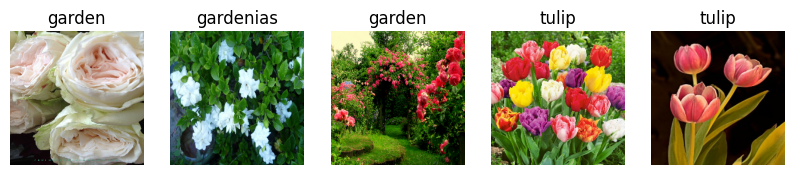

In [95]:
class_names = train_ds.class_names
print("Classes:", class_names)

# Preview images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


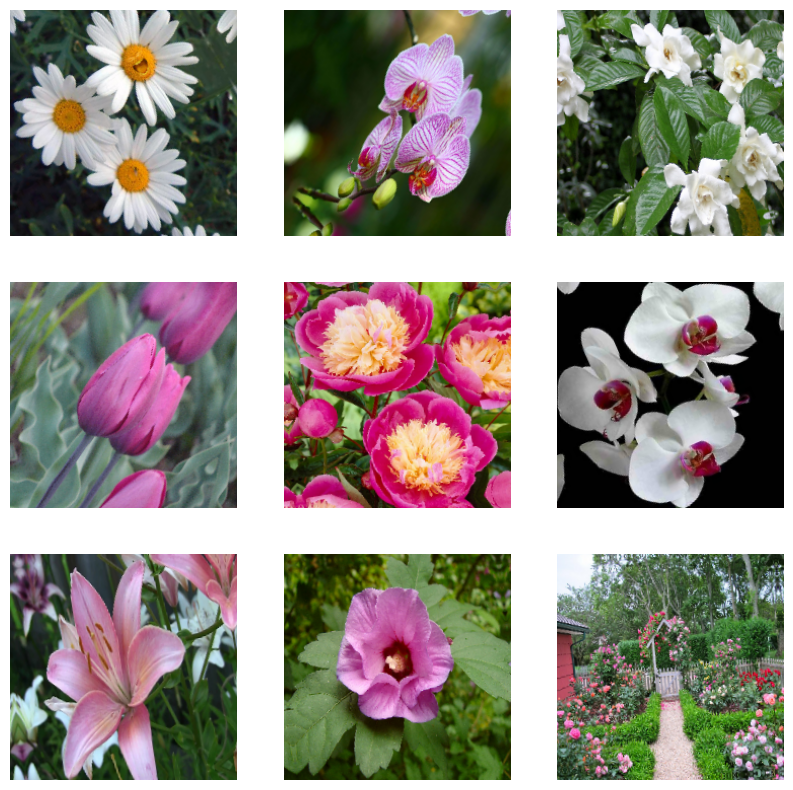

In [96]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

# augmenting training data only
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

# visualizing augmentations to check
plt.figure(figsize=(10, 10))
for images, labels in augmented_train_ds.take(1):  # Take one batch
    for i in range(9):  # Show 9 images
        ax = plt.subplot(3, 3, i + 1)
        # Convert tensor to numpy array and clip values between 0 and 255
        img = images[i].numpy().astype("uint8")
        plt.imshow(img)
        plt.axis("off")
plt.show()

In [97]:
def make_transfer_model(input_shape, num_classes):
    backbone = keras.applications.MobileNetV2(
        weights="imagenet",
        include_top=False,
        input_shape=input_shape,
    )
    backbone.trainable = False

    inputs = layers.Input(input_shape)
    x = keras.applications.mobilenet_v2.preprocess_input(inputs)
    x = backbone(x)
    x = layers.Dropout(0.3)(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)
    outputs = layers.Dense(units, activation=None)(x)

    return keras.Model(inputs, outputs, name="keypoint_detector")

In [98]:
model2 = make_transfer_model(input_shape=image_size + (3,), num_classes=10)

In [101]:
from tensorflow import keras
from tensorflow.keras import layers

# Define model (make sure you define this first)
model2 = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_ds.class_names))
])

# Compile
model2.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

# Callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_epoch_{epoch}.h5")
]

# Train
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8,
    callbacks=callbacks
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.1883 - loss: 2.7959

59/59 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - acc: 0.1895 - loss: 2.7870 - val_acc: 0.4315 - val_loss: 1.7595
Epoch 2/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.6051 - loss: 1.2741

59/59 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - acc: 0.6061 - loss: 1.2724 - val_acc: 0.5205 - val_loss: 1.6073
Epoch 3/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8604 - loss: 0.5200

59/59 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - acc: 0.8607 - loss: 0.5192 - val_acc: 0.5205 - val_loss: 1.5532
Epoch 4/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9819 - loss: 0.1732

59/59 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - acc: 0.9820 - loss: 0.1726 - val_acc: 0.5068 - val_loss: 1.4112
Epoch 5/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9929 - loss: 0.0605

59/59 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - acc: 0.9930 - loss: 0.0604 - val_acc: 0.5205 - val_loss: 1.4839
Epoch 6/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9969 - loss: 0.0448

59/59 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - acc: 0.9969 - loss: 0.0449 - val_acc: 0.5137 - val_loss: 1.4958
Epoch 7/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9972 - loss: 0.0340

59/59 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - acc: 0.9971 - loss: 0.0344 - val_acc: 0.4932 - val_loss: 1.5926
Epoch 8/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9932 - loss: 0.0372

59/59 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - acc: 0.9932 - loss: 0.0372 - val_acc: 0.5137 - val_loss: 1.4884


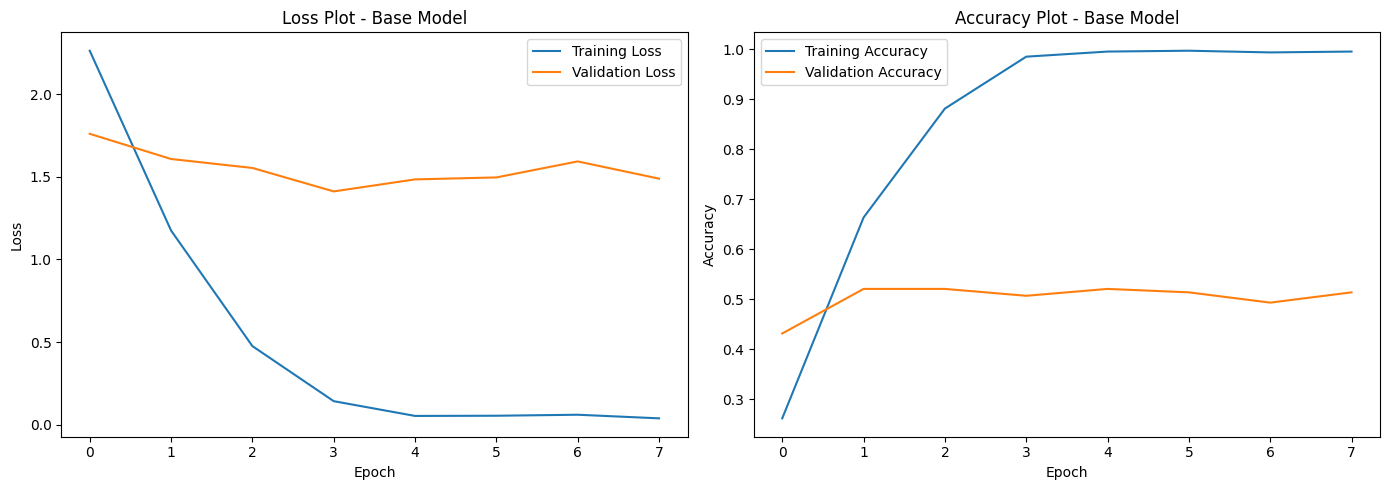

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

axs[0].plot(history.history["loss"], label="Training Loss")
axs[0].plot(history.history["val_loss"], label="Validation Loss")
axs[0].set_title("Loss Plot - Base Model")
axs[0].legend()
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")

axs[1].plot(history.history["acc"], label="Training Accuracy")
axs[1].plot(history.history["val_acc"], label="Validation Accuracy")
axs[1].set_title("Accuracy Plot - Base Model")
axs[1].legend()
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()


In [103]:
model2.save("flowers_classifier_.keras")